In [1]:
import os
import sys

import numpy as np

## Plotting stuff
import matplotlib.pyplot as plt
import matplotlib as mpl

## For colorbar 
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Get physical constants from Scipy
import scipy.constants as con

## For fitting
import scipy.optimize as opt

## For matlab loading
import scipy.io as sio

module_path = os.path.abspath(os.path.join('..', '..', '..'))
sys.path.append(module_path)
## Load custom package modules
from misloc_mispol_package.calc import BEM_simulation_wrapper as bem
from misloc_mispol_package.calc import fitting_misLocalization as fit
from misloc_mispol_package.calc import coupled_dipoles as cp
from misloc_mispol_package.optics import diffraction_int as diffi
from misloc_mispol_package.optics import fibonacci as fib
from misloc_mispol_package.optics import anal_foc_diff_fields as adf

In [2]:
## Parameter setting needs to be in cell following mpl import for some reason 
## https://github.com/jupyter/notebook/issues/3385
##
## Default parameters inspired by 
## http://nipunbatra.github.io/2014/08/latexify/
params = {
    'text.latex.preamble': ['\\usepackage{gensymb}'],
    'image.origin': 'lower',
    'image.interpolation': 'nearest',
    'image.cmap': 'magma',
    'axes.grid': False,
    'figure.dpi': 200,  # to adjust notebook inline plot size
    'savefig.dpi': 200,  # to adjust notebook inline plot size
#     'axes.labelsize': 12, # fontsize for x and y labels (was 10)
    'axes.titlesize': 14,
    'font.size': 8, # was 10
#     'savefig.dpi': 150,  # to adjust notebook inline plot size
    'axes.labelsize': 10, # fontsize for x and y labels (was 10)
    'axes.titlesize': 10,
    'font.size': 8, # was 10
    'legend.fontsize': 8, # was 10
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'text.usetex': True,
    'figure.figsize': [3.39, 2.10],
    'font.family': 'serif',
    'figure.max_open_warning':10001
}
mpl.rcParams.update(params)

In [3]:
## Some useful numerical constants
hbar = con.physical_constants['Planck constant over 2 pi in eV s'][0]
c = con.physical_constants['speed of light in vacuum'][0]*1e2 #cm/m

m_per_nm = fit.m_per_nm

eps_b = 1.778 ## Water
cm_per_nm = 1E-7

hres_obs_pts = diffi.observation_points(
    -1000*m_per_nm, 1000*m_per_nm, -1000*m_per_nm, 1000*m_per_nm, 201)

In [4]:
k = 1240/633/hbar/c
xi, y = hres_obs_pts[1:]

/Users/chair/Documents/Academia/SuperRes/Biteen_colab/Mispolarization/python/misloc_mispol_package/optics/anal_foc_diff_fields.py:27: RuntimeWarning: divide by zero encountered in true_divide
  sphj1_on_krho = spf.spherical_jn( 1, k*rho(xi, y) )/(k*rho(xi, y))
/Users/chair/Documents/Academia/SuperRes/Biteen_colab/Mispolarization/python/misloc_mispol_package/optics/anal_foc_diff_fields.py:27: RuntimeWarning: invalid value encountered in true_divide
  sphj1_on_krho = spf.spherical_jn( 1, k*rho(xi, y) )/(k*rho(xi, y))
/Users/chair/Documents/Academia/SuperRes/Biteen_colab/Mispolarization/python/misloc_mispol_package/optics/anal_foc_diff_fields.py:30: RuntimeWarning: divide by zero encountered in true_divide
  j2_on_krho = spf.jv(2, k*rho(xi, y) )/(k*rho(xi, y))
/Users/chair/Documents/Academia/SuperRes/Biteen_colab/Mispolarization/python/misloc_mispol_package/optics/anal_foc_diff_fields.py:30: RuntimeWarning: invalid value encountered in true_divide
  j2_on_krho = spf.jv(2, k*rho(xi, y) )/(

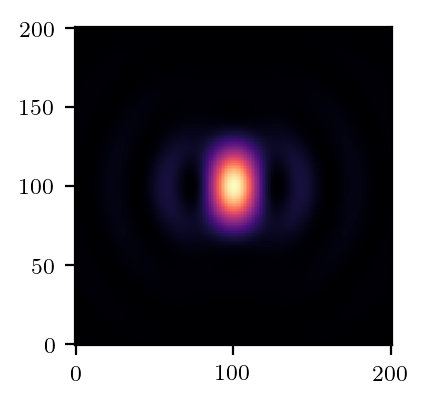

In [5]:
test_field_x = adf.E_field(0, hres_obs_pts[1], hres_obs_pts[2], 1240/633/hbar/c)
test_im_x = (np.abs(test_field_x)**2.).sum(axis=0)
plt.imshow(test_im_x)

In [6]:
test_im_x.shape

(201, 201)

In [7]:
import scipy.special as spf

In [8]:
(spf.spherical_jn( 1, k*adf.rho(xi, y) )/(k*adf.rho(xi, y))).shape

/Users/chair/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/chair/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


(201, 201)

In [9]:
np.argwhere(k*adf.rho(xi, y) == 0).shape

(1, 2)

In [10]:
(spf.spherical_jn( 1, k*adf.rho(xi, y) )/(k*adf.rho(xi, y)))[k*adf.rho(xi, y) == 0]



/Users/chair/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/chair/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([nan])

/Users/chair/Documents/Academia/SuperRes/Biteen_colab/Mispolarization/python/misloc_mispol_package/optics/anal_foc_diff_fields.py:75: RuntimeWarning: divide by zero encountered in true_divide
  j2_on_krho = spf.jv(2, k*rho(xi, y) )/(k*rho(xi, y))
/Users/chair/Documents/Academia/SuperRes/Biteen_colab/Mispolarization/python/misloc_mispol_package/optics/anal_foc_diff_fields.py:75: RuntimeWarning: invalid value encountered in true_divide
  j2_on_krho = spf.jv(2, k*rho(xi, y) )/(k*rho(xi, y))
/Users/chair/Documents/Academia/SuperRes/Biteen_colab/Mispolarization/python/misloc_mispol_package/optics/anal_foc_diff_fields.py:78: RuntimeWarning: divide by zero encountered in true_divide
  sphj0_on_krhosqrd = spf.spherical_jn(0, k*rho(xi, y) )/(k*rho(xi, y))**2.
/Users/chair/Documents/Academia/SuperRes/Biteen_colab/Mispolarization/python/misloc_mispol_package/optics/anal_foc_diff_fields.py:82: RuntimeWarning: invalid value encountered in add
  sphj0_on_krhosqrd


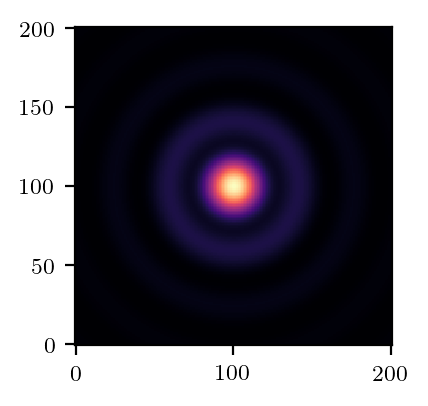

In [11]:
test_field_z = adf.E_pz(hres_obs_pts[1], hres_obs_pts[2], 1240/633/hbar/c)
test_im_z = (np.abs(test_field_z)**2.).sum(axis=0)
plt.imshow(test_im_z)

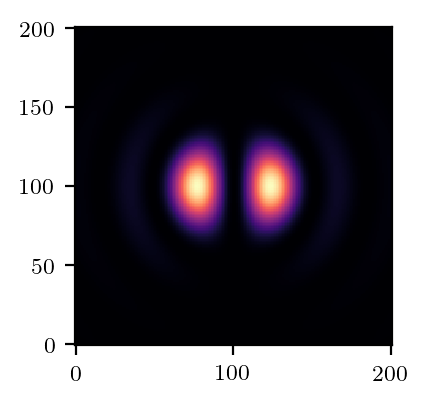

In [17]:
test_field_z = adf.E_pz(hres_obs_pts[1], hres_obs_pts[2], 1240/633/hbar/c)
test_im_z = (np.abs(test_field_z)**2.)[1]
plt.imshow(test_im_z)

/Users/chair/Documents/Academia/SuperRes/Biteen_colab/Mispolarization/python/misloc_mispol_package/optics/anal_foc_diff_fields.py:110: RuntimeWarning: divide by zero encountered in true_divide
  j2_on_krho = spf.jv(2, k*rho(xi, y) )/(k*rho(xi, y))
/Users/chair/Documents/Academia/SuperRes/Biteen_colab/Mispolarization/python/misloc_mispol_package/optics/anal_foc_diff_fields.py:110: RuntimeWarning: invalid value encountered in true_divide
  j2_on_krho = spf.jv(2, k*rho(xi, y) )/(k*rho(xi, y))
/Users/chair/Documents/Academia/SuperRes/Biteen_colab/Mispolarization/python/misloc_mispol_package/optics/anal_foc_diff_fields.py:113: RuntimeWarning: divide by zero encountered in true_divide
  sphj0_on_krhosqrd = spf.spherical_jn(0, k*rho(xi, y) )/(k*rho(xi, y))**2.
/Users/chair/Documents/Academia/SuperRes/Biteen_colab/Mispolarization/python/misloc_mispol_package/optics/anal_foc_diff_fields.py:117: RuntimeWarning: invalid value encountered in add
  sphj0_on_krhosqrd


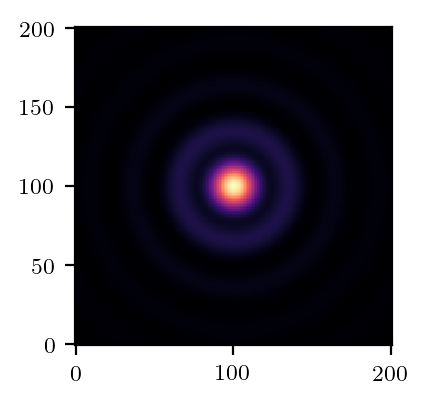

In [13]:
test_field_z = adf.old_E_pz(hres_obs_pts[1], hres_obs_pts[2], 1240/532/hbar/c)
test_im_z = (np.abs(test_field_z)**2.).sum(axis=0)
plt.imshow(test_im_z)

In [14]:
1240/633/hbar/c

99273.08279666264

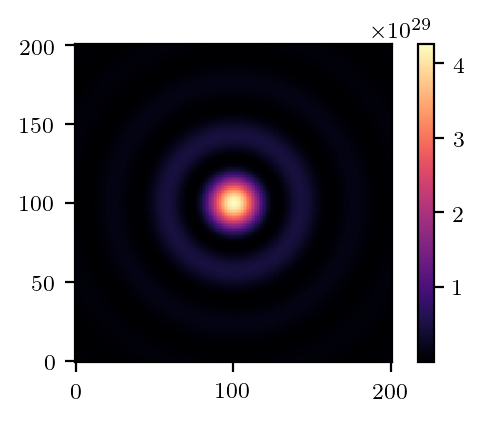

In [15]:
test_field_z = adf.old_E_pz(hres_obs_pts[1], hres_obs_pts[2], 1240/633/hbar/c)
test_im_z = (np.abs(test_field_z)**2.)[2]
plt.imshow(test_im_z)
plt.colorbar()